### Import

In [4]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import time
from tensorflow.python.keras.models import load_model

In [5]:
DIR_MODEL = '../Model'

### Load Model (earlier file)

In [6]:
def latest_file_in_dir(directory):
    # Liste tous les fichiers dans le répertoire
    files = glob.glob(os.path.join(directory, "*"))

    # Trouve et retourne le fichier le plus récent
    latest_file = max(files, key=os.path.getctime)

    return latest_file

file = latest_file_in_dir(DIR_MODEL)
print(file)

../Model\best_model.h5


In [7]:
# Load model from the disk
model = load_model(file)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              11264     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8

### Prediction

In [9]:
df = pd.read_csv('../data/predictive_maintenance_preprocess.csv', index_col=0)

In [10]:
name_target_col = list(filter(lambda ligne: 'Target' in ligne, df.columns))

In [11]:
x = df.drop(columns=name_target_col)
y = df[name_target_col]

In [12]:
y= pd.DataFrame(pd.get_dummies(y[name_target_col[0]].to_numpy()))
y.columns=['Target_0', 'Target_1','Target_2', 'Target_3','Target_4']

In [13]:
y_pred = model.predict(x)


### Matrice de confusion

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=np.argmax(y.values, axis=1), y_pred=np.argmax(y_pred, axis=1))
print(cm)

[[ 112    0    0    0    0]
 [  59 9064   30   86  404]
 [   0    0   77    0    1]
 [   0    0    0   95    0]
 [   0    0    0    0   45]]


<AxesSubplot: >

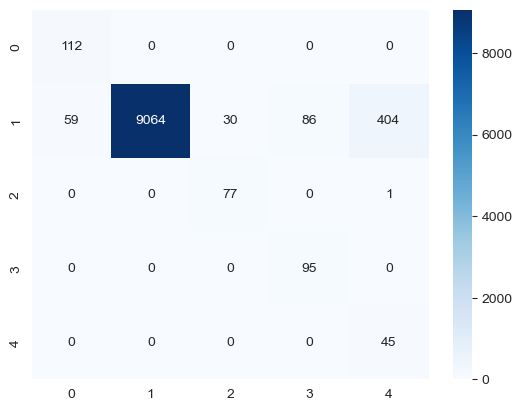

In [16]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap="Blues", fmt=".0f")

### Explicabilité

In [17]:
import shap

In [24]:
# Fits the explainer
explainer = shap.Explainer(model.predict, x.head(100))
# Calculates the SHAP values - It takes some time
shap_values = explainer(x.head(100))

ExactExplainer explainer: 101it [12:53,  7.81s/it]                         


In [23]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!